Environment Setup


In [ ]:
# Importing libraries
import pandas as pd
import math
import numpy as np
import os
print('Libraries Imported')

#!unzip yelp_reviews.zip
df= pd.read_csv('police.csv')
print(df.head())

print('Setup Complete')

Libraries Imported
        Incident Datetime  ... Current Police Districts
0  2020/03/11 09:10:00 AM  ...                      NaN
1  2018/07/04 08:00:00 AM  ...                      NaN
2  2020/01/31 04:00:00 AM  ...                      NaN
3  2020/02/16 09:00:00 AM  ...                      NaN
4  2020/02/20 01:15:00 PM  ...                      NaN

[5 rows x 16 columns]
Setup Complete


In [ ]:
from google.colab import files
uploaded = files.upload()
import io
df = pd.read_csv(io.BytesIO(uploaded['police.csv']))
df

KeyboardInterrupt: ignored

In [ ]:

!pip install geopandas
!pip install descartes 

import geopandas as gpd

# Next, print out the shapefile. 
# It won't look like much because we are looking at geographic coordinates. 

print("Loading Shapefile...")

# If using your files, replace below filename ("Clean_Streets_Index_Grids_2018_Quarter_3.shp") with the 
# shapefile filename you uploaded. 

shapefile = gpd.read_file("geo_export_7b126c33-da87-4bf5-b1a9-6fabc5a517f4.shp")

Loading Shapefile...


In [ ]:
len(df['Incident Year'].unique())

3

In [ ]:
!pip install -U folium
!pip install -U geopandas

     |████████████████████████████████| 102kB 3.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.11.0 which is incompatible.
  Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
     |████████████████████████████████| 972kB 4.7MB/s 
     |████████████████████████████████| 10.9MB 12.2MB/s 
     |████████████████████████████████| 14.8MB 317kB/s 


In [ ]:
import folium
import geopandas

In [ ]:
df

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident_Category,Incident Description,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts
0,2020/03/11 09:10:00 AM,2020/03/11,09:10,2020,Wednesday,2020/03/11 09:10:00 AM,Recovered Vehicle,"Vehicle, Recovered, Truck",Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018/07/04 08:00:00 AM,2018/07/04,08:00,2018,Wednesday,2018/07/13 09:31:00 AM,Lost Property,Lost Property,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/01/31 04:00:00 AM,2020/01/31,04:00,2020,Friday,2020/03/02 05:46:00 PM,Lost Property,Lost Property,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/02/16 09:00:00 AM,2020/02/16,09:00,2020,Sunday,2020/02/19 08:21:00 AM,Larceny Theft,"Theft, Other Property, >$950",Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/02/20 01:15:00 PM,2020/02/20,13:15,2020,Thursday,2020/02/24 06:26:00 PM,Lost Property,Lost Property,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65529,2020/06/22 04:54:00 PM,2020/06/22,16:54,2020,Monday,2020/06/22 04:54:00 PM,Fraud,False Personation,Out of SF,Mission Bay,6.0,37.773467,-122.391434,"(37.773466920607476, -122.39143433652146)",34.0,1.0
65530,2020/06/22 04:54:00 PM,2020/06/22,16:54,2020,Monday,2020/06/22 04:54:00 PM,Fraud,"Credit Application, Fraudulent",Out of SF,Mission Bay,6.0,37.773467,-122.391434,"(37.773466920607476, -122.39143433652146)",34.0,1.0
65531,2020/06/14 03:07:00 PM,2020/06/14,15:07,2020,Sunday,2020/06/14 03:07:00 PM,Fraud,"Theft, False Pretenses, Felony",Out of SF,Mission Bay,6.0,37.773467,-122.391434,"(37.773466920607476, -122.39143433652146)",34.0,1.0
65532,2020/01/06 10:00:00 AM,2020/01/06,10:00,2020,Monday,2020/01/14 02:05:00 AM,Larceny Theft,"Theft, From Locked Vehicle, >$950",Richmond,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def time_category(time):
    if 0 <= time < 3:
        return "Late Night"
    elif 3 <= time < 6:
        return "Middle Night"
    elif 6 <= time < 9:
        return "Morning"
    elif 9 <= time < 12:
        return "Late Morning"
    elif 12 <= time < 15:
        return "Afternoon"
    elif 15 <= time < 18:
        return "Late Afternoon"
    elif 18 <= time < 21:
        return "Evening"
    elif 21 <= time < 24:
        return "Night"
df["Incident Hour"] = df["Incident Time"].apply(lambda x : x[0:2]).astype(int)
df["Time_Category"] = df["Incident Hour"].apply(time_category)
df = df.join( pd.get_dummies(df["Time_Category"]), how = 'outer')


In [ ]:
df.to_csv('police_time.csv') 
files.download('police_time.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from shapely.geometry import Point
from geopandas import GeoDataFrame

from folium.plugins import HeatMap
map1 = folium.Map(location=(37.76, -122.45), zoom_start=11)
shape = geopandas.read_file('geo_export_7b126c33-da87-4bf5-b1a9-6fabc5a517f4.shp')
shape.to_file('geo_export_7b126c33-da87-4bf5-b1a9-6fabc5a517f4.geojson', driver='GeoJSON')

folium.GeoJson(
   shape,
).add_to(map1)

df2 = df[(df['Incident_Category']=='Homicide') | (df['Incident_Category']=="Prostitution") |
       (df['Incident_Category']=="Rape") |
         (df['Incident_Category']=="Suicide") |
       (df['Incident_Category']=="Sex Offense")
        |
       (df['Incident_Category']=="Family Offense")]
df2 = df2.dropna()
lat=list(df2["Latitude"])
lon=list(df2["Longitude"])
crimeType = list(df2["Incident_Category"])
crimeDescr = list(df2["Incident Description"])

for lt,ln,crm, desc in zip(lat,lon, crimeType, crimeDescr):
    if crm == 'Homicide':
        popup = crm
        icon = folium.Icon(color="black", icon="fire")
    elif crm == 'Prostitution':
        popup = crm
        icon = folium.Icon(color="orange", icon="fire")
    elif crm == 'Rape':
        popup = crm
        icon = folium.Icon(color="green", icon="fire")
    elif crm == 'Family Offense':
        popup = crm, desc
        icon = folium.Icon(color="darkgreen", icon="fire")
    elif crm == 'Suicide':
        icon = folium.Icon(color="blue", icon="fire")
        popup = crm
    elif crm == 'Sex Offense':
        if desc == 'Child Abuse, Pornography': 
            icon = folium.Icon(color="purple", icon="fire")
            popup = crm, desc
        else: 
            icon = folium.Icon(color="darkpurple", icon="fire")
            popup = crm, desc
    folium.Marker(location=[lt,ln], icon= icon, popup= popup ).add_to(map1)  



folium.LayerControl().add_to(map1)



map1

DriverError: ignored

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from datetime import datetime, time
le = LabelEncoder()


df["Incident Day of Week"] =  le.fit_transform(df["Incident Day of Week"])
#df['Incident_Category'] = le.fit_transform(df['Incident_Category'].astype(str))
#df["Analysis Neighborhood"] =  le.fit_transform(df["Analysis Neighborhood"].astype(str))
df["Police District"] =  le.fit_transform(df["Police District"])

df.point.str.extract(r'\((?P<lat>[\-\d\.]+),\s+(?P<lon>[\-\d\.]+)\)')
# df2['combined'] = df2[['Latitude', 'Longitude']].apply(list, axis=1)
# df2['combined']= df2.combined.astype(float)
df['Incident Time']= pd.to_datetime(df['Incident Time'])

df['period'] = (df['Incident Time'].dt.hour % 24 + 4) // 4
df['period'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)
#df["period"] =  le.fit_transform(df["period"])

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from datetime import datetime, time
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
dfFamilyOffense = df[df['Incident_Category']=="Family Offense"]
X_trainfamLat, X_testfamLat, y_trainfamLat, y_testfamLat =  train_test_split(dfFamilyOffense, dfFamilyOffense.Latitude, test_size=0.2)

myFeatsTrainLat = X_trainfamLat[['Police District','Supervisor District', 'Incident Day of Week', "period", "Analysis Neighborhood"]]
myFeatsTestLat = X_testfamLat[['Police District','Supervisor District', 'Incident Day of Week', "period", "Analysis Neighborhood"]]

IncidentEncodedTrainLat = (X_trainfamLat["Latitude"])
IncidentEncodedTestLat = (X_testfamLat["Latitude"])

clffam = MLPRegressor(hidden_layer_sizes=(10), learning_rate = 'adaptive', activation='tanh', 
                     max_iter=333, solver='lbfgs', verbose=1, random_state=42)

clffam.fit(myFeatsTrainLat, IncidentEncodedTrainLat)

print('Mean Squared Error on training LAT---')
y_pred_trainfam1 = clffam.predict(myFeatsTrainLat)
print(mean_squared_error(IncidentEncodedTrainLat, y_pred_trainfam1))

print('Mean Squared Error on test LAT---')
y_pred_testfam1=clffam.predict(myFeatsTestLat)
print(mean_squared_error(IncidentEncodedTestLat, y_pred_testfam1))


print('Mean Absolute Error on training LAT---')
y_pred_trainfam2 = clffam.predict(myFeatsTrainLat)
print(mean_absolute_error(IncidentEncodedTrainLat, y_pred_trainfam2))

print('Mean Absolute Error on test LAT---')
y_pred_testfam2 = clffam.predict(myFeatsTestLat)
print(mean_absolute_error(IncidentEncodedTestLat, y_pred_testfam2))

#I split up the lat and long bc if i predicted them together it worsened my predictions

X_trainfamLon, X_testfamLon, y_trainfamLon, y_testfamLon =  train_test_split(dfFamilyOffense, dfFamilyOffense.Longitude, test_size=0.2)

myFeatsTrainLon = X_trainfamLon[['Police District','Supervisor District', 'Incident Day of Week', "period", "Analysis Neighborhood"]]
myFeatsTestLon = X_testfamLon[['Police District','Supervisor District', 'Incident Day of Week', "period", "Analysis Neighborhood"]]

IncidentEncodedTrainLon = (X_trainfamLon[ "Longitude"])
IncidentEncodedTestLon = (X_testfamLon["Longitude"])

clffam2 = MLPRegressor(hidden_layer_sizes=(10), learning_rate = 'adaptive', activation='tanh', 
                     max_iter=333, solver='lbfgs', verbose=1, random_state=42)

clffam2.fit(myFeatsTrainLon, IncidentEncodedTrainLon)

print('Mean Squared Error on training LON---')
y_pred_trainfam3=clffam2.predict(myFeatsTrainLon)
print(mean_squared_error(IncidentEncodedTrainLon, y_pred_trainfam3))

print('Mean Squared Error on test LON---')
y_pred_testfam3=clffam2.predict(myFeatsTestLon)
print(mean_squared_error(IncidentEncodedTestLon, y_pred_testfam3))


print('Mean Absolute Error on training LON---')
y_pred_trainfam4=clffam2.predict(myFeatsTrainLon)
print(mean_absolute_error(IncidentEncodedTrainLon, y_pred_trainfam4))

print('Mean Absolute Error on test LON---')
y_pred_testfam4=clffam2.predict(myFeatsTestLon)
print(mean_absolute_error(IncidentEncodedTestLon, y_pred_testfam4))
#I need to try rescaling the lat/long data which explains why the error is so low because lat and long are very minutely different but make a huge difference when you map it out

Mean Squared Error on training LAT---
0.0005233402578479248
Mean Squared Error on test LAT---
0.0010370778467561383
Mean Absolute Error on training LAT---
0.019773745349828224
Mean Absolute Error on test LAT---
0.025985510219002014
Mean Squared Error on training LON---
0.0007302874600110454
Mean Squared Error on test LON---
0.0007405306713051481
Mean Absolute Error on training LON---
0.02086097089902239
Mean Absolute Error on test LON---
0.018840253687370915


In [ ]:

dffam=  {'lat':y_pred_trainfam1 , 'long': y_pred_trainfam3}
dffam = pd.DataFrame(dffam)
df_fam = df[df["Incident_Category"] == "Family Offense"]
mapfam = folium.Map(location=(37.76, -122.45), zoom_start=11)

lat=list(dffam['lat'])
lon=list(dffam['long'])

for lt,ln in zip(lat,lon):
    folium.Marker(location=[lt,ln]).add_to(mapfam)  

lat_ = list(df_fam['Latitude'])
lon_ = list(df_fam['Longitude'])


for lt,ln in zip(lat_,lon_):
    folium.Marker(location=[lt,ln], icon = folium.Icon(color="darkpurple", icon="fire")).add_to(mapfam)  
mapfam

In [ ]:
df['frequency'] = df['Incident_Category'].value_counts()

In [ ]:
df2 = df.groupby(['Analysis Neighborhood', 'Incident Description']).Time_Category.agg('count').to_frame('count').reset_index()
df['Analysis Neighborhood'].unique()
df2

df3 = df.groupby(['Incident_Category']).Incident_Category.agg('count').to_frame('count').reset_index()
df3 = df.groupby(['Time_Category']).Time_Category.max('count').to_frame('count').reset_index()
df2
df4 = df2.sort_values('count', ascending=False).drop_duplicates(['Analysis Neighborhood'])
df4

,Analysis Neighborhood,Incident Description,count
3389,Mission,"Theft, From Locked Vehicle, >$950",404
2048,Hayes Valley,"Theft, From Locked Vehicle, >$950",319
5975,South of Market,"Theft, From Locked Vehicle, >$950",285
6296,Tenderloin,Battery,278
7339,Western Addition,"Theft, From Locked Vehicle, >$950",275
1393,Financial District/South Beach,"Theft, From Locked Vehicle, >$950",247
294,Bayview Hunters Point,"Vehicle, Recovered, Auto",237
2989,Marina,"Theft, From Locked Vehicle, >$950",236
4180,North Beach,"Theft, From Locked Vehicle, >$950",207
5606,Russian Hill,"Theft, From Locked Vehicle, >$950",202


In [ ]:
map1 = folium.Map(location=(37.76, -122.45), zoom_start=11)
shape = geopandas.read_file('geo_export_7b126c33-da87-4bf5-b1a9-6fabc5a517f4.shp')
shape.to_file('geo_export_7b126c33-da87-4bf5-b1a9-6fabc5a517f4.geojson', driver='GeoJSON')

folium.GeoJson(
   shape,
).add_to(map1)
# folium.Choropleth(
#     geo_data= shape,
#     data=df2,
#     columns= ['Analysis Neighborhood', 'count'],
#     key_on = 'feature.properties.nhood',
#     fill_opacity=.8,
#     line_opacity=0.9,
#     fill_color='RdPu',
#     legend_name='% in Poverty',
#     highlight=True
# ).add_to(map1)
for idx, row in shape.iterrows():
    plt.annotate(s=row['nhood'], xy=row['coords'], ha='center', weight= 'bold', fontsize=8)

folium.LayerControl().add_to(map1)
map1

NameError: ignored

In [ ]:
import seaborn as sns
import plotly.express as px

fig = px.bar(df4, y='Incident Description',
             x='count', orientation='h', 
             color='Analysis Neighborhood',
             barmode='group', width=1300, height=700,)
txt="                                                                 Number of Incidents Per Time of Day in SF Neighborhoods"
fig.update_yaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_layout(title_text=txt,title_x=0.5, title_y=0.01)
ax.xaxis.set_tick_params(labelsize = 15)
fig.show()

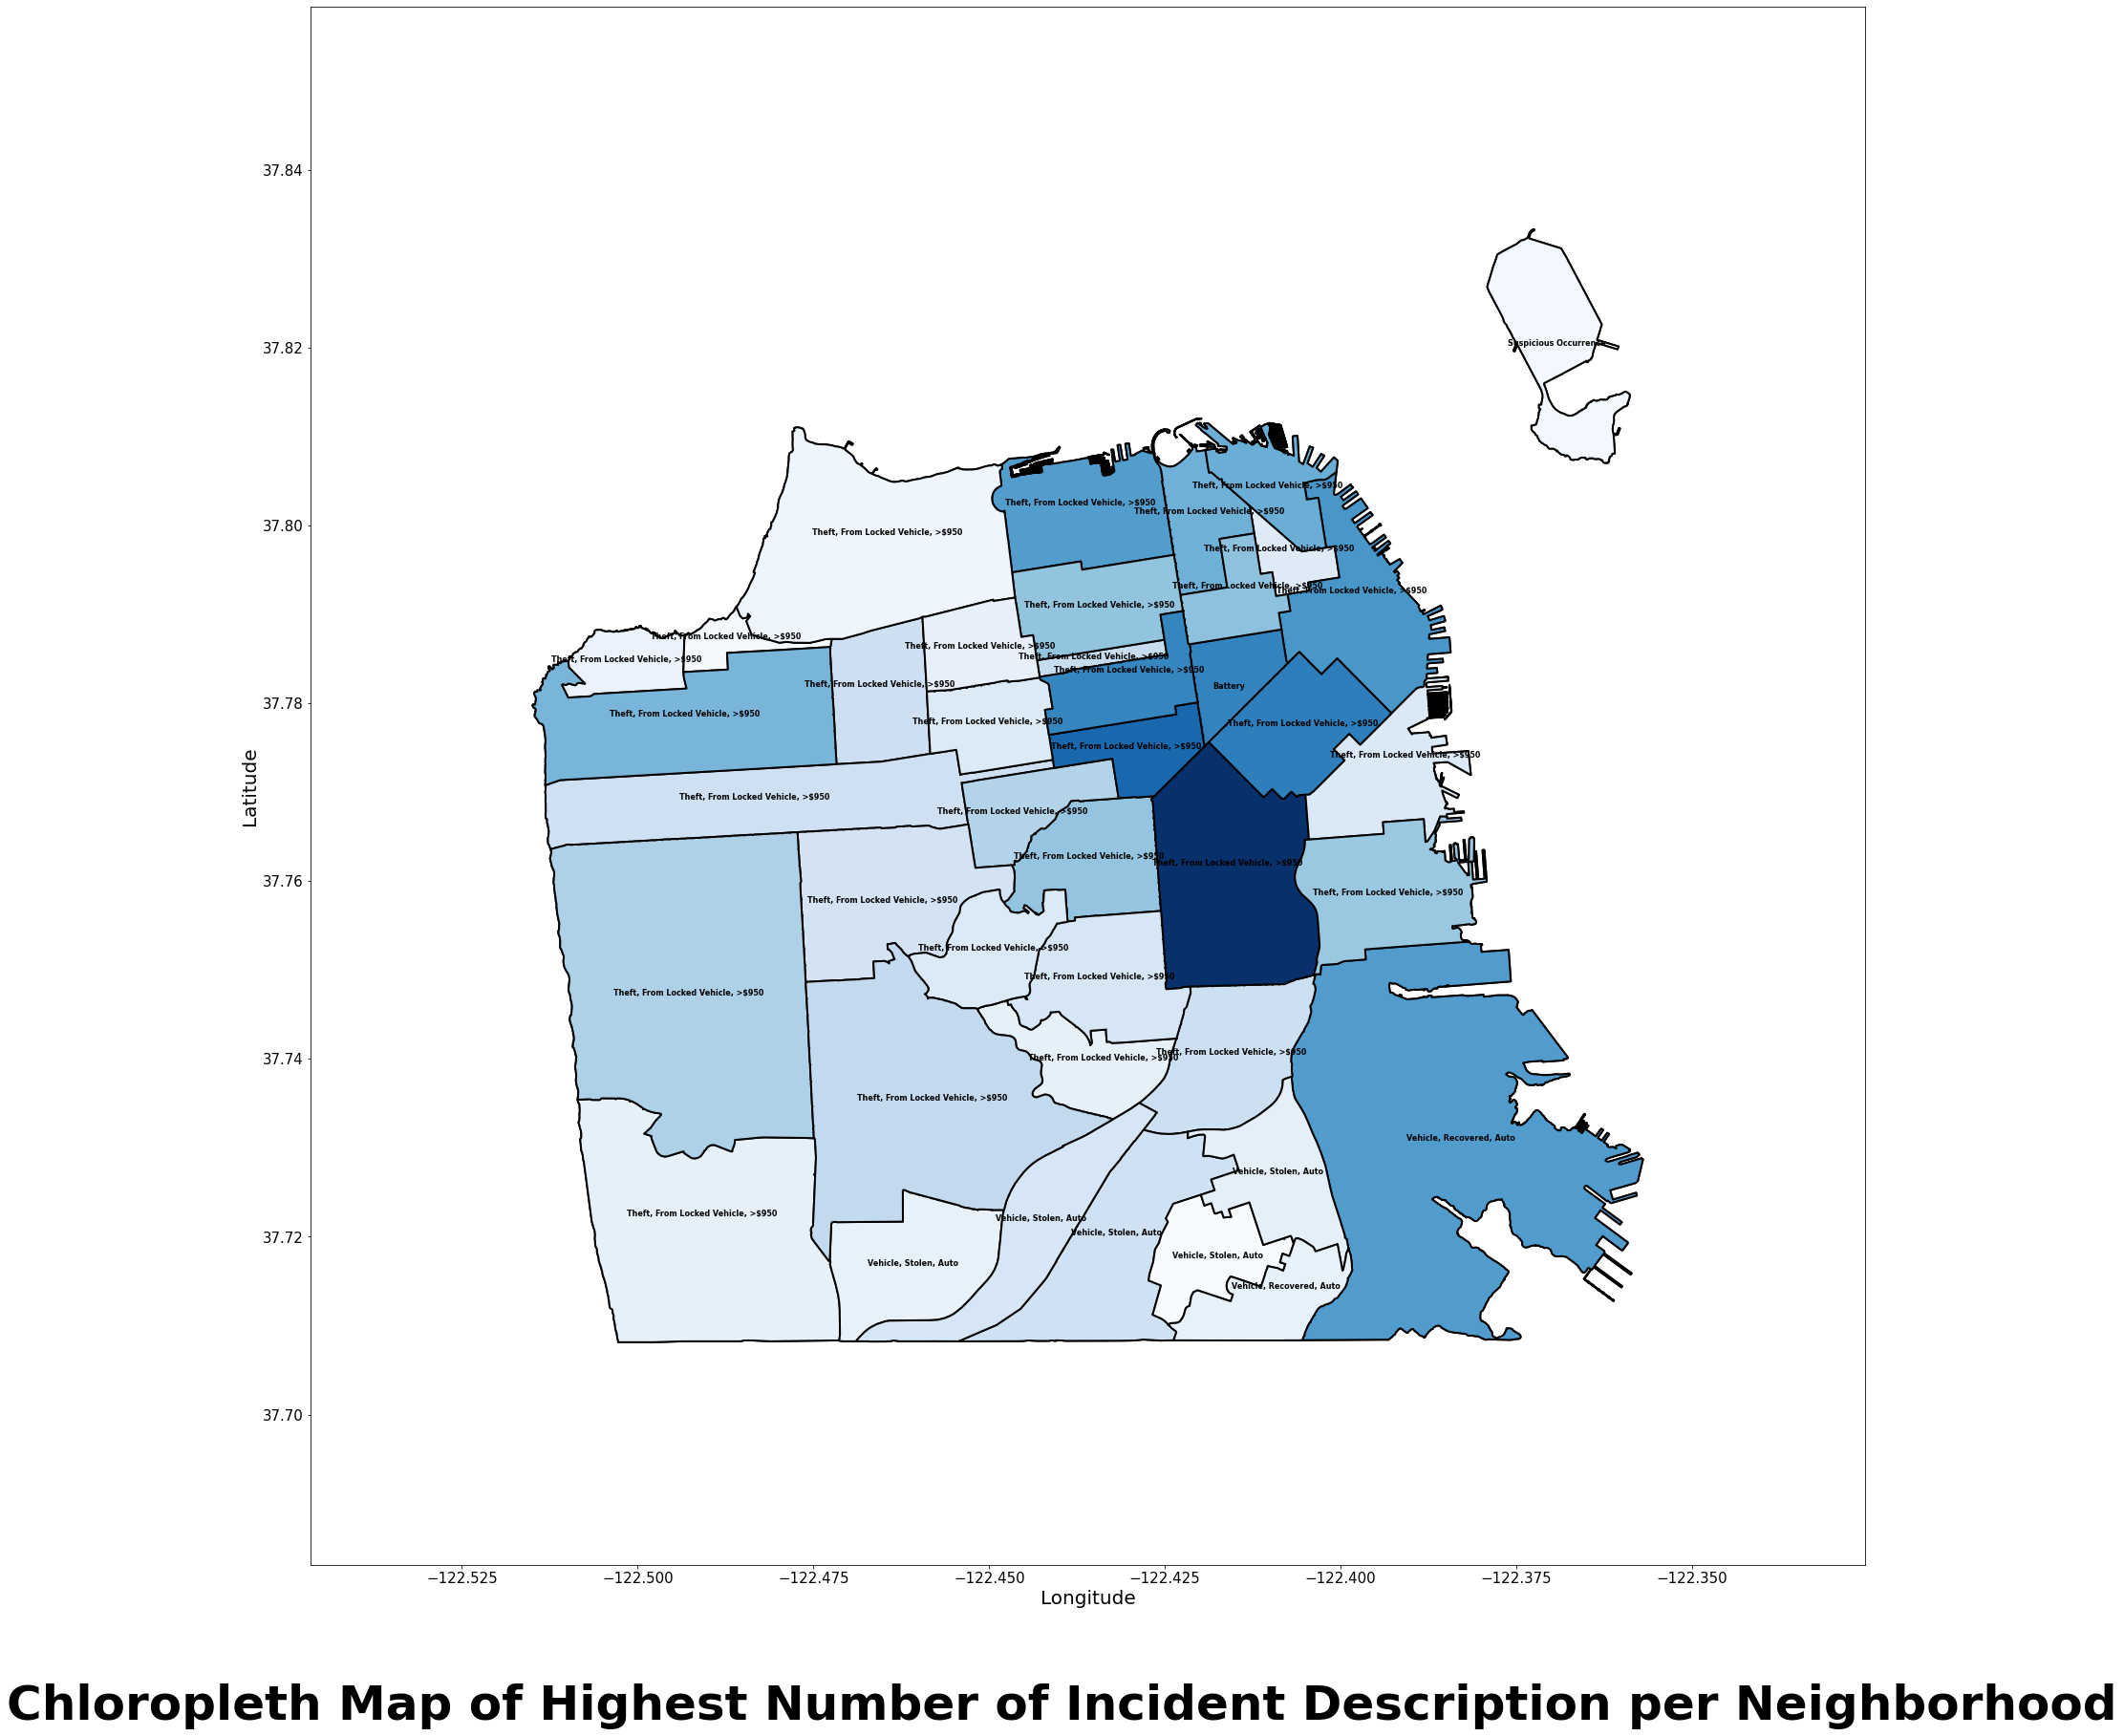

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

fig, ax = plt.subplots(1, figsize = (30,30))
shape.plot(ax=ax, color = 'grey',linewidth=2, edgecolor = 'black')
avgcombined = pd.pivot_table(df4, values= ['count', 'Incident Description'], index= ['Analysis Neighborhood'], aggfunc=np.mean)
avgcombined.reset_index(inplace = True)

merged_df = shape.set_index('nhood').join(df4.set_index('Analysis Neighborhood'))
merged_df.reset_index(inplace = True)
merged_df['coords'] = merged_df['geometry'].apply(lambda x: x.representative_point().coords[:])
merged_df['coords'] = [coords[0] for coords in merged_df['coords']]
for idx, row in merged_df.iterrows():
    plt.annotate(s=row['Incident Description'], xy=row['coords'], ha='center', weight= 'bold', fontsize=8)

ax.margins(0.2, 0.2)
ax.set_xlabel("Longitude", fontsize = 20)
ax.set_ylabel("Latitude", fontsize = 20)
ax.yaxis.set_tick_params(labelsize = 15)
ax.xaxis.set_tick_params(labelsize = 15)
txt = 'Chloropleth Map of Highest Number of Incident Description per Neighborhood'
plt.figtext(.5,.05, txt, wrap=True, horizontalalignment='center', weight= 'bold', fontsize=50)
merged_df.plot(column = 'count', ax=ax, legend=False, cmap="Blues", linewidth=2, edgecolor='black')


In [ ]:
df2['Analysis Neighborhood'].unique()

array(['Bayview Hunters Point', 'Bernal Heights', 'Castro/Upper Market',
       'Chinatown', 'Excelsior', 'Financial District/South Beach',
       'Glen Park', 'Golden Gate Park', 'Haight Ashbury', 'Hayes Valley',
       'Inner Richmond', 'Inner Sunset', 'Japantown', 'Lakeshore',
       'Lincoln Park', 'Lone Mountain/USF', 'Marina', 'McLaren Park',
       'Mission', 'Mission Bay', 'Nob Hill', 'Noe Valley', 'North Beach',
       'Oceanview/Merced/Ingleside', 'Outer Mission', 'Outer Richmond',
       'Pacific Heights', 'Portola', 'Potrero Hill', 'Presidio',
       'Presidio Heights', 'Russian Hill', 'Seacliff', 'South of Market',
       'Sunset/Parkside', 'Tenderloin', 'Treasure Island', 'Twin Peaks',
       'Visitacion Valley', 'West of Twin Peaks', 'Western Addition'],
      dtype=object)

In [ ]:
from folium import plugins
import geopandas
import folium
from folium.plugins import HeatMapWithTime

from folium.plugins import  TimeSliderChoropleth

In [ ]:

m = folium.Map(location=(37.76, -122.45), zoom_start=11)
shape = geopandas.read_file('geo_export_83678dc5-8212-4b6e-8f90-868822137582.shp')
shape.to_file('geo_export_83678dc5-8212-4b6e-8f90-868822137582.geojson', driver='GeoJSON')

folium.GeoJson(
   shape,
).add_to(m)

folium.Choropleth(
    geo_data= shape,
    data=df2,
    columns= ['Analysis Neighborhood', 'count'],
    key_on = 'feature.properties.nhood',
    fill_opacity=.8,
    line_opacity=0.9,
    fill_color='RdPu',
    legend_name='% in Poverty',
    highlight=True
).add_to(map1)
folium.LayerControl().add_to(m)

colors_hex = get_colors(df["total_cases"])
ccaas = list(df["id"].unique())
dates = list(df["date_for_folium"].unique())

# creates the styledict for the map
styledict = {}

for ccaa in ccaas:
    styledict[str(ccaa)] = {date: {'color': map_value_to_color(df[(df["Analysis Neighborhood"] == ccaa) &
                                                                  (df["Incident Date"] == date)]["total_cases"].values[0],
                                                                colors_hex), # get the value and map to the color with our previous function
                                   'opacity': 0.6} for date in dates}
    
g = TimeSliderChoropleth(
    shape,
    styledict=styledict, overlay = True
).add_to(m)

folium.LayerControl().add_to(m)
m.save('TimeSeries_CO2_2004to2006.html')
m

DriverError: ignored

In [ ]:
m = folium.Map(location=(37.76, -122.45), zoom_start=11)
 
folium.GeoJson(
   shape,
).add_to(m)
m

NameError: ignored

In [ ]:
m = folium.Map(location=(37.76, -122.45), zoom_start=11)
shape = geopandas.read_file('tl_2016_06_tract.shp')
shape.to_file('tl_2016_06_tract.geojson', driver='GeoJSON')

folium.GeoJson(
   shape,
).add_to(m)
m

In [ ]:
m = folium.Map(location=(37.76, -122.45), zoom_start=11)
shape = geopandas.read_file('geo_export_7f41c329-dab9-4734-9591-b1787d2330fa.shp')
shape.to_file('geo_export_7f41c329-dab9-4734-9591-b1787d2330fa.geojson', driver='GeoJSON')

folium.GeoJson(
   shape,
).add_to(m)
m

DriverError: ignored

In [ ]:
shape

,aland10,awater10,countyfp10,funcstat10,geoid10,intptlat10,intptlon10,mtfcc10,name10,namelsad10,statefp10,tractce10,geometry
0,370459.0,0.0,075,S,06075016500,+37.7741958,-122.4477884,G5020,165,Census Tract 165,06,016500,"POLYGON ((-122.44647 37.77580, -122.44478 37.7..."
1,309097.0,0.0,075,S,06075016400,+37.7750995,-122.4369729,G5020,164,Census Tract 164,06,016400,"POLYGON ((-122.44034 37.77658, -122.43984 37.7..."
2,245867.0,0.0,075,S,06075016300,+37.7760456,-122.4295509,G5020,163,Census Tract 163,06,016300,"POLYGON ((-122.42915 37.77801, -122.42891 37.7..."
3,368901.0,0.0,075,S,06075016100,+37.7799831,-122.4286631,G5020,161,Census Tract 161,06,016100,"POLYGON ((-122.42891 37.77804, -122.42915 37.7..."
4,158236.0,0.0,075,S,06075016000,+37.7823363,-122.4224838,G5020,160,Census Tract 160,06,016000,"POLYGON ((-122.42042 37.78058, -122.42034 37.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,631206.0,0.0,075,S,06075017601,+37.7794338,-122.4107241,G5020,176.01,Census Tract 176.01,06,017601,"POLYGON ((-122.40716 37.77974, -122.40769 37.7..."
193,469526.0,0.0,075,S,06075017000,+37.7648874,-122.4394975,G5020,170,Census Tract 170,06,017000,"POLYGON ((-122.44257 37.76593, -122.44236 37.7..."
194,294192.0,0.0,075,S,06075016900,+37.7670961,-122.4324782,G5020,169,Census Tract 169,06,016900,"POLYGON ((-122.42695 37.76917, -122.42746 37.7..."
195,490693.0,0.0,075,S,06075016700,+37.7703481,-122.4377358,G5020,167,Census Tract 167,06,016700,"POLYGON ((-122.43930 37.76817, -122.44014 37.7..."


In [ ]:
m = folium.Map(location=(37.76, -122.45), zoom_start=11)
shape = geopandas.read_file('geo_export_acb6a236-785a-489a-8f1d-4bb0c8585454.shp')
shape.to_file('geo_export_acb6a236-785a-489a-8f1d-4bb0c8585454.geojson', driver='GeoJSON')

folium.GeoJson(
   shape,
).add_to(m)
m

,nhood,geometry
0,Bayview Hunters Point,"POLYGON ((-122.38158 37.75307, -122.38157 37.7..."
1,Bernal Heights,"POLYGON ((-122.40361 37.74934, -122.40378 37.7..."
2,Castro/Upper Market,"POLYGON ((-122.42656 37.76948, -122.42695 37.7..."
3,Chinatown,"POLYGON ((-122.40623 37.79756, -122.40551 37.7..."
4,Excelsior,"POLYGON ((-122.42398 37.73155, -122.42392 37.7..."
5,Financial District/South Beach,"MULTIPOLYGON (((-122.38753 37.78280, -122.3875..."
6,Glen Park,"POLYGON ((-122.44738 37.74648, -122.44728 37.7..."
7,Inner Richmond,"POLYGON ((-122.45932 37.78752, -122.45928 37.7..."
8,Golden Gate Park,"POLYGON ((-122.44092 37.77363, -122.44073 37.7..."
9,Haight Ashbury,"POLYGON ((-122.43200 37.77143, -122.43190 37.7..."


In [ ]:
#Importing demographic data from https://default.sfplanning.org/publications_reports/SF_NGBD_SocioEconomic_Profiles/2012-2016_ACS_Profile_Neighborhoods_Final.pdf

def female(x): #percent female
  if x == 'Bayview Hunters Point':
    return 51
  elif x == 'Bernal Heights':
    return 48
  elif x == 'Castro/Upper Market':
    return 37
  elif x == 'Chinatown':
    return 52
  elif x == 'Excelsior':
    return 49
  elif x == 'Financial District/South Beach':
    return 47
  elif x == 'Glen Park':
    return 46
  elif x == 'Golden Gate Park':
    return 35
  elif x == 'Haight Ashbury':
    return 47
  elif x == 'Hayes Valley':
    return 42
  elif x == 'Inner Richmond':
    return 53
  elif x == 'Inner Sunset':
    return 52
  elif x == 'Japantown':
    return 59
  elif x == 'Lakeshore':
    return 53
  elif x == 'Lincoln Park':
    return 26
  elif x == 'Lone Mountain/USF':
    return 54
  elif x == 'Marina':
    return 51
  elif x == 'McLaren Park':
    return 59
  elif x == 'Mission':
    return 44
  elif x == 'Mission Bay':
    return 47
  elif x == 'Nob Hill':
    return 5
  elif x == 'Noe Valley':
    return 49
  elif x == 'North Beach':
    return 47
  elif x == 'Oceanview/Merced/Ingleside':
    return 51
  elif x == 'Outer Mission':
    return 5
  elif x == 'Outer Richmond':
    return 52
  elif x == 'Pacific Heights':
    return 52
  elif x == 'Portola':
    return 52
  elif x == 'Potrero Hill':
    return 47
  elif x == 'Presidio':
    return 49
  elif x == 'Presidio Heights':
    return 55
  elif x == 'Russian Hill':
    return 52
  elif x == 'Seacliff':
    return 52
  elif x == 'South of Market':
    return 44
  elif x == 'Sunset/Parkside':
    return 51
  elif x == 'Tenderloin':
    return 39
  elif x == 'Treasure Island':
    return 44
  elif x == 'Twin Peaks':
    return 41
  elif x == 'Visitacion Valley':
    return 51
  elif x == 'West of Twin Peaks':
    return 5
  elif x == 'Western Addition':
    return 5



def single_fam(x): # % of single family homes
  if x == 'Bayview Hunters Point':
    return 63
  elif x == 'Bernal Heights':
    return 6
  elif x == 'Castro/Upper Market':
    return 22
  elif x == 'Chinatown':
    return 4
  elif x == 'Excelsior':
    return 84
  elif x == 'Financial District/South Beach':
    return 2
  elif x == 'Glen Park':
    return 62
  elif x == 'Golden Gate Park':
    return 0
  elif x == 'Haight Ashbury':
    return 16
  elif x == 'Hayes Valley':
    return 7
  elif x == 'Inner Richmond':
    return 21
  elif x == 'Inner Sunset':
    return 43
  elif x == 'Japantown':
    return 4
  elif x == 'Lakeshore':
    return 15
  elif x == 'Lincoln Park':
    return 22
  elif x == 'Lone Mountain/USF':
    return 13
  elif x == 'Marina':
    return 12
  elif x == 'McLaren Park':
    return 31
  elif x == 'Mission':
    return 14
  elif x == 'Mission Bay':
    return 1
  elif x == 'Nob Hill':
    return 3
  elif x == 'Noe Valley':
    return 37
  elif x == 'North Beach':
    return 6
  elif x == 'Oceanview/Merced/Ingleside':
    return 81
  elif x == 'Outer Mission':
    return 79
  elif x == 'Outer Richmond':
    return 35
  elif x == 'Pacific Heights':
    return 11
  elif x == 'Portola':
    return 82
  elif x == 'Potrero Hill':
    return 31
  elif x == 'Presidio':
    return 27
  elif x == 'Presidio Heights':
    return 24
  elif x == 'Russian Hill':
    return 6
  elif x == 'Seacliff':
    return 75
  elif x == 'South of Market':
    return 4
  elif x == 'Sunset/Parkside':
    return 73
  elif x == 'Tenderloin':
    return 1
  elif x == 'Treasure Island':
    return 18
  elif x == 'Twin Peaks':
    return 40
  elif x == 'Visitacion Valley':
    return 72
  elif x == 'West of Twin Peaks':
    return 88
  elif x == 'Western Addition':
    return 6



def apartments(x): # % of apartments with 20+ units
  if x == 'Bayview Hunters Point':
    return 1
  elif x == 'Bernal Heights':
    return 3
  elif x == 'Castro/Upper Market':
    return 11
  elif x == 'Chinatown':
    return 56
  elif x == 'Excelsior':
    return 1
  elif x == 'Financial District/South Beach':
    return 95
  elif x == 'Glen Park':
    return 8
  elif x == 'Golden Gate Park':
    return 22
  elif x == 'Haight Ashbury':
    return 6
  elif x == 'Hayes Valley':
    return 32
  elif x == 'Inner Richmond':
    return 3
  elif x == 'Inner Sunset':
    return 8
  elif x == 'Japantown':
    return 72
  elif x == 'Lakeshore':
    return 62
  elif x == 'Lincoln Park':
    return 6
  elif x == 'Lone Mountain/USF':
    return 13
  elif x == 'Marina':
    return 16
  elif x == 'McLaren Park':
    return 42
  elif x == 'Mission':
    return 22
  elif x == 'Mission Bay':
    return 97
  elif x == 'Nob Hill':
    return 49
  elif x == 'Noe Valley':
    return 4
  elif x == 'North Beach':
    return 34
  elif x == 'Oceanview/Merced/Ingleside':
    return 5
  elif x == 'Outer Mission':
    return 2
  elif x == 'Outer Richmond':
    return 4
  elif x == 'Pacific Heights':
    return 36
  elif x == 'Portola':
    return 0
  elif x == 'Potrero Hill':
    return 16
  elif x == 'Presidio':
    return 13
  elif x == 'Presidio Heights':
    return 12
  elif x == 'Russian Hill':
    return 24
  elif x == 'Seacliff':
    return 0
  elif x == 'South of Market':
    return 74
  elif x == 'Sunset/Parkside':
    return 2
  elif x == 'Tenderloin':
    return 88
  elif x == 'Treasure Island':
    return 2
  elif x == 'Twin Peaks':
    return 14
  elif x == 'Visitacion Valley':
    return 3
  elif x == 'West of Twin Peaks':
    return 2
  elif x == 'Western Addition':
    return 63



def med_rent(x): #median rent
  if x == 'Bayview Hunters Point':
    return 1083
  elif x == 'Bernal Heights':
    return 283
  elif x == 'Castro/Upper Market':
    return 1216
  elif x == 'Chinatown':
    return 558
  elif x == 'Excelsior':
    return 1428
  elif x == 'Financial District/South Beach':
    return 1114
  elif x == 'Glen Park':
    return 1056.25
  elif x == 'Golden Gate Park':
    return 1383.01
  elif x == 'Haight Ashbury':
    return 1722
  elif x == 'Hayes Valley':
    return 1087
  elif x == 'Inner Richmond':
    return 927
  elif x == 'Inner Sunset':
    return 1550
  elif x == 'Japantown':
    return 1322.04
  elif x == 'Lakeshore':
    return 2176
  elif x == 'Lincoln Park':
    return 1315.4
  elif x == 'Lone Mountain/USF':
    return 1307.41
  elif x == 'Marina':
    return 1744
  elif x == 'McLaren Park':
    return 1030.29
  elif x == 'Mission':
    return 762
  elif x == 'Mission Bay':
    return 1058.09
  elif x == 'Nob Hill':
    return 1560
  elif x == 'Noe Valley':
    return 1493
  elif x == 'North Beach':
    return 1367
  elif x == 'Oceanview/Merced/Ingleside':
    return 717
  elif x == 'Outer Mission':
    return 1295.23
  elif x == 'Outer Richmond':
    return 1645
  elif x == 'Pacific Heights':
    return 1212
  elif x == 'Portola':
    return 1119
  elif x == 'Potrero Hill':
    return 1351
  elif x == 'Presidio':
    return 949
  elif x == 'Presidio Heights':
    return 1599
  elif x == 'Russian Hill':
    return 1563
  elif x == 'Seacliff':
    return 1315.4
  elif x == 'South of Market':
    return 1059
  elif x == 'Sunset/Parkside':
    return 1476
  elif x == 'Tenderloin':
    return 927
  elif x == 'Treasure Island':
    return 1298
  elif x == 'Twin Peaks':
    return 575
  elif x == 'Visitacion Valley':
    return 1083
  elif x == 'West of Twin Peaks':
    return 1752
  elif x == 'Western Addition':
    return 1194



def med_home_val(x): #median home value
  if x == 'Bayview Hunters Point':
    return 566355
  elif x == 'Bernal Heights':
    return 838307
  elif x == 'Castro/Upper Market':
    return 907208
  elif x == 'Chinatown':
    return 846774
  elif x == 'Excelsior':
    return 628628
  elif x == 'Financial District/South Beach':
    return 681493
  elif x == 'Glen Park':
    return 954665
  elif x == 'Golden Gate Park':
    return 809077.72
  elif x == 'Haight Ashbury':
    return 908163
  elif x == 'Hayes Valley':
    return 805046
  elif x == 'Inner Richmond':
    return 839002
  elif x == 'Inner Sunset':
    return 910805
  elif x == 'Japantown':
    return 606250
  elif x == 'Lakeshore':
    return 681159
  elif x == 'Lincoln Park':
    return 750000
  elif x == 'Lone Mountain/USF':
    return 904561
  elif x == 'Marina':
    return 975000
  elif x == 'McLaren Park':
    return 669643
  elif x == 'Mission':
    return 797306
  elif x == 'Mission Bay':
    return 754513
  elif x == 'Nob Hill':
    return 685404
  elif x == 'Noe Valley':
    return 934003
  elif x == 'North Beach':
    return 806903
  elif x == 'Oceanview/Merced/Ingleside':
    return 524528
  elif x == 'Outer Mission':
    return 684176
  elif x == 'Outer Richmond':
    return 880501
  elif x == 'Pacific Heights':
    return 866733
  elif x == 'Portola':
    return 653611
  elif x == 'Potrero Hill':
    return 879765
  elif x == 'Presidio':
    return 755919.66
  elif x == 'Presidio Heights':
    return 913846
  elif x == 'Russian Hill':
    return 810158
  elif x == 'Seacliff':
    return 865565
  elif x == 'South of Market':
    return 752521
  elif x == 'Sunset/Parkside':
    return 829029
  elif x == 'Tenderloin':
    return 509804
  elif x == 'Treasure Island':
    return 778440.67
  elif x == 'Twin Peaks':
    return 885714
  elif x == 'Visitacion Valley':
    return 580231
  elif x == 'West of Twin Peaks':
    return 927384
  elif x == 'Western Addition':
    return 636719



def med_household_income(x): #median household income
  if x == 'Bayview Hunters Point':
    return 55750
  elif x == 'Bernal Heights':
    return 106914
  elif x == 'Castro/Upper Market':
    return 127273
  elif x == 'Chinatown':
    return 21219
  elif x == 'Excelsior':
    return 72473
  elif x == 'Financial District/South Beach':
    return 136864
  elif x == 'Glen Park':
    return 121535
  elif x == 'Golden Gate Park':
    return 119444
  elif x == 'Haight Ashbury':
    return 130616
  elif x == 'Hayes Valley':
    return 98068
  elif x == 'Inner Richmond':
    return 87801
  elif x == 'Inner Sunset':
    return 108966
  elif x == 'Japantown':
    return 58414
  elif x == 'Lakeshore':
    return 42585
  elif x == 'Lincoln Park':
    return 150000
  elif x == 'Lone Mountain/USF':
    return 100905
  elif x == 'Marina':
    return 132186
  elif x == 'McLaren Park':
    return 16404
  elif x == 'Mission':
    return 83234
  elif x == 'Mission Bay':
    return 111897
  elif x == 'Nob Hill':
    return 74500
  elif x == 'Noe Valley':
    return 136423
  elif x == 'North Beach':
    return 78281
  elif x == 'Oceanview/Merced/Ingleside':
    return 72274
  elif x == 'Outer Mission':
    return 85531
  elif x == 'Outer Richmond':
    return 77465
  elif x == 'Pacific Heights':
    return 121643
  elif x == 'Portola':
    return 77053
  elif x == 'Potrero Hill':
    return 155083
  elif x == 'Presidio':
    return 179537
  elif x == 'Presidio Heights':
    return 124668
  elif x == 'Russian Hill':
    return 110819
  elif x == 'Seacliff':
    return 180000
  elif x == 'South of Market':
    return 43466
  elif x == 'Sunset/Parkside':
    return 89402
  elif x == 'Tenderloin':
    return 23513
  elif x == 'Treasure Island':
    return 48971
  elif x == 'Twin Peaks':
    return 97624
  elif x == 'Visitacion Valley':
    return 54745
  elif x == 'West of Twin Peaks':
    return 135614
  elif x == 'Western Addition':
    return 61996



def perc_poverty(x): #percent of population in poverty
  if x == 'Bayview Hunters Point':
    return 19
  elif x == 'Bernal Heights':
    return 9
  elif x == 'Castro/Upper Market':
    return 7
  elif x == 'Chinatown':
    return 27
  elif x == 'Excelsior':
    return 9
  elif x == 'Financial District/South Beach':
    return 9
  elif x == 'Glen Park':
    return 7
  elif x == 'Golden Gate Park':
    return 11.02
  elif x == 'Haight Ashbury':
    return 9
  elif x == 'Hayes Valley':
    return 13
  elif x == 'Inner Richmond':
    return 13
  elif x == 'Inner Sunset':
    return 9
  elif x == 'Japantown':
    return 20
  elif x == 'Lakeshore':
    return 28
  elif x == 'Lincoln Park':
    return 4
  elif x == 'Lone Mountain/USF':
    return 10
  elif x == 'Marina':
    return 5
  elif x == 'McLaren Park':
    return 33
  elif x == 'Mission':
    return 14
  elif x == 'Mission Bay':
    return 9
  elif x == 'Nob Hill':
    return 14
  elif x == 'Noe Valley':
    return 4
  elif x == 'North Beach':
    return 16
  elif x == 'Oceanview/Merced/Ingleside':
    return 14
  elif x == 'Outer Mission':
    return 7
  elif x == 'Outer Richmond':
    return 10
  elif x == 'Pacific Heights':
    return 6
  elif x == 'Portola':
    return 9
  elif x == 'Potrero Hill':
    return 9
  elif x == 'Presidio':
    return 4
  elif x == 'Presidio Heights':
    return 8
  elif x == 'Russian Hill':
    return 9
  elif x == 'Seacliff':
    return 6
  elif x == 'South of Market':
    return 27
  elif x == 'Sunset/Parkside':
    return 10
  elif x == 'Tenderloin':
    return 30
  elif x == 'Treasure Island':
    return 51
  elif x == 'Twin Peaks':
    return 5
  elif x == 'Visitacion Valley':
    return 15
  elif x == 'West of Twin Peaks':
    return 6
  elif x == 'Western Addition':
    return 17



def unemployment(x): #percent of population that is unemployed
  if x == 'Bayview Hunters Point':
    return 12
  elif x == 'Bernal Heights':
    return 7
  elif x == 'Castro/Upper Market':
    return 4
  elif x == 'Chinatown':
    return 7
  elif x == 'Excelsior':
    return 8
  elif x == 'Financial District/South Beach':
    return 5
  elif x == 'Glen Park':
    return 5
  elif x == 'Golden Gate Park':
    return 7.05
  elif x == 'Haight Ashbury':
    return 4
  elif x == 'Hayes Valley':
    return 5
  elif x == 'Inner Richmond':
    return 6
  elif x == 'Inner Sunset':
    return 4
  elif x == 'Japantown':
    return 5
  elif x == 'Lakeshore':
    return 16
  elif x == 'Lincoln Park':
    return 10
  elif x == 'Lone Mountain/USF':
    return 8
  elif x == 'Marina':
    return 4
  elif x == 'McLaren Park':
    return 26
  elif x == 'Mission':
    return 6
  elif x == 'Mission Bay':
    return 5
  elif x == 'Nob Hill':
    return 5
  elif x == 'Noe Valley':
    return 4
  elif x == 'North Beach':
    return 7
  elif x == 'Oceanview/Merced/Ingleside':
    return 10
  elif x == 'Outer Mission':
    return 8
  elif x == 'Outer Richmond':
    return 4
  elif x == 'Pacific Heights':
    return 4
  elif x == 'Portola':
    return 7
  elif x == 'Potrero Hill':
    return 6
  elif x == 'Presidio':
    return 1
  elif x == 'Presidio Heights':
    return 5
  elif x == 'Russian Hill':
    return 3
  elif x == 'Seacliff':
    return 5
  elif x == 'South of Market':
    return 6
  elif x == 'Sunset/Parkside':
    return 6
  elif x == 'Tenderloin':
    return 8
  elif x == 'Treasure Island':
    return 12
  elif x == 'Twin Peaks':
    return 4
  elif x == 'Visitacion Valley':
    return 10
  elif x == 'West of Twin Peaks':
    return 4
  elif x == 'Western Addition':
    return 6



def perc_asian(x): #percent of population that is asian
  if x == 'Bayview Hunters Point':
    return 36
  elif x == 'Bernal Heights':
    return 17
  elif x == 'Castro/Upper Market':
    return 12
  elif x == 'Chinatown':
    return 81
  elif x == 'Excelsior':
    return 48
  elif x == 'Financial District/South Beach':
    return 36
  elif x == 'Glen Park':
    return 15
  elif x == 'Golden Gate Park':
    return 30.2
  elif x == 'Haight Ashbury':
    return 9
  elif x == 'Hayes Valley':
    return 14
  elif x == 'Inner Richmond':
    return 36
  elif x == 'Inner Sunset':
    return 33
  elif x == 'Japantown':
    return 35
  elif x == 'Lakeshore':
    return 30
  elif x == 'Lincoln Park':
    return 27
  elif x == 'Lone Mountain/USF':
    return 22
  elif x == 'Marina':
    return 10
  elif x == 'McLaren Park':
    return 48
  elif x == 'Mission':
    return 14
  elif x == 'Mission Bay':
    return 41
  elif x == 'Nob Hill':
    return 34
  elif x == 'Noe Valley':
    return 13
  elif x == 'North Beach':
    return 40
  elif x == 'Oceanview/Merced/Ingleside':
    return 54
  elif x == 'Outer Mission':
    return 54
  elif x == 'Outer Richmond':
    return 46
  elif x == 'Pacific Heights':
    return 18
  elif x == 'Portola':
    return 55
  elif x == 'Potrero Hill':
    return 16
  elif x == 'Presidio':
    return 6
  elif x == 'Presidio Heights':
    return 21
  elif x == 'Russian Hill':
    return 28
  elif x == 'Seacliff':
    return 17
  elif x == 'South of Market':
    return 39
  elif x == 'Sunset/Parkside':
    return 57
  elif x == 'Tenderloin':
    return 31
  elif x == 'Treasure Island':
    return 15
  elif x == 'Twin Peaks':
    return 19
  elif x == 'Visitacion Valley':
    return 55
  elif x == 'West of Twin Peaks':
    return 34
  elif x == 'Western Addition':
    return 27



def perc_black(x): #percent of population that is black
  if x == 'Bayview Hunters Point':
    return 28
  elif x == 'Bernal Heights':
    return 5
  elif x == 'Castro/Upper Market':
    return 3
  elif x == 'Chinatown':
    return 1
  elif x == 'Excelsior':
    return 2
  elif x == 'Financial District/South Beach':
    return 2
  elif x == 'Glen Park':
    return 6
  elif x == 'Golden Gate Park':
    return 6.49
  elif x == 'Haight Ashbury':
    return 3
  elif x == 'Hayes Valley':
    return 9
  elif x == 'Inner Richmond':
    return 2
  elif x == 'Inner Sunset':
    return 2
  elif x == 'Japantown':
    return 3
  elif x == 'Lakeshore':
    return 6
  elif x == 'Lincoln Park':
    return 10
  elif x == 'Lone Mountain/USF':
    return 6
  elif x == 'Marina':
    return 1
  elif x == 'McLaren Park':
    return 22
  elif x == 'Mission':
    return 3
  elif x == 'Mission Bay':
    return 7
  elif x == 'Nob Hill':
    return 3
  elif x == 'Noe Valley':
    return 1
  elif x == 'North Beach':
    return 2
  elif x == 'Oceanview/Merced/Ingleside':
    return 12
  elif x == 'Outer Mission':
    return 1
  elif x == 'Outer Richmond':
    return 2
  elif x == 'Pacific Heights':
    return 3
  elif x == 'Portola':
    return 5
  elif x == 'Potrero Hill':
    return 6
  elif x == 'Presidio':
    return .3
  elif x == 'Presidio Heights':
    return 2
  elif x == 'Russian Hill':
    return 1
  elif x == 'Seacliff':
    return 1
  elif x == 'South of Market':
    return 11
  elif x == 'Sunset/Parkside':
    return 1
  elif x == 'Tenderloin':
    return 10
  elif x == 'Treasure Island':
    return 20
  elif x == 'Twin Peaks':
    return 4
  elif x == 'Visitacion Valley':
    return 11
  elif x == 'West of Twin Peaks':
    return 3
  elif x == 'Western Addition':
    return 21



def perc_white(x): #percent of population that is white
  if x == 'Bayview Hunters Point':
    return 14
  elif x == 'Bernal Heights':
    return 57
  elif x == 'Castro/Upper Market':
    return 78
  elif x == 'Chinatown':
    return 14
  elif x == 'Excelsior':
    return 28
  elif x == 'Financial District/South Beach':
    return 54
  elif x == 'Glen Park':
    return 70
  elif x == 'Golden Gate Park':
    return 94
  elif x == 'Haight Ashbury':
    return 80
  elif x == 'Hayes Valley':
    return 67
  elif x == 'Inner Richmond':
    return 54
  elif x == 'Inner Sunset':
    return 56
  elif x == 'Japantown':
    return 57
  elif x == 'Lakeshore':
    return 46
  elif x == 'Lincoln Park':
    return 56
  elif x == 'Lone Mountain/USF':
    return 62
  elif x == 'Marina':
    return 83
  elif x == 'McLaren Park':
    return 6
  elif x == 'Mission':
    return 57
  elif x == 'Mission Bay':
    return 42
  elif x == 'Nob Hill':
    return 55
  elif x == 'Noe Valley':
    return 78
  elif x == 'North Beach':
    return 51
  elif x == 'Oceanview/Merced/Ingleside':
    return 20
  elif x == 'Outer Mission':
    return 24
  elif x == 'Outer Richmond':
    return 44
  elif x == 'Pacific Heights':
    return 74
  elif x == 'Portola':
    return 22
  elif x == 'Potrero Hill':
    return 64
  elif x == 'Presidio':
    return 88
  elif x == 'Presidio Heights':
    return 69
  elif x == 'Russian Hill':
    return 67
  elif x == 'Seacliff':
    return 76
  elif x == 'South of Market':
    return 38
  elif x == 'Sunset/Parkside':
    return 35
  elif x == 'Tenderloin':
    return 43
  elif x == 'Treasure Island':
    return 34
  elif x == 'Twin Peaks':
    return 64
  elif x == 'Visitacion Valley':
    return 12
  elif x == 'West of Twin Peaks':
    return 54
  elif x == 'Western Addition':
    return 43



def perc_native(x): #percent of population that is native american/hawaiian
  if x == 'Bayview Hunters Point':
    return 2.3
  elif x == 'Bernal Heights':
    return 1.1
  elif x == 'Castro/Upper Market':
    return .8
  elif x == 'Chinatown':
    return .4
  elif x == 'Excelsior':
    return 1.4
  elif x == 'Financial District/South Beach':
    return .4
  elif x == 'Glen Park':
    return .3
  elif x == 'Golden Gate Park':
    return 0
  elif x == 'Haight Ashbury':
    return .4
  elif x == 'Hayes Valley':
    return .6
  elif x == 'Inner Richmond':
    return .5
  elif x == 'Inner Sunset':
    return .3
  elif x == 'Japantown':
    return 0
  elif x == 'Lakeshore':
    return .4
  elif x == 'Lincoln Park':
    return 0
  elif x == 'Lone Mountain/USF':
    return 1.1
  elif x == 'Marina':
    return .3
  elif x == 'McLaren Park':
    return 13
  elif x == 'Mission':
    return 1.2
  elif x == 'Mission Bay':
    return 1
  elif x == 'Nob Hill':
    return .1
  elif x == 'Noe Valley':
    return .7
  elif x == 'North Beach':
    return 0
  elif x == 'Oceanview/Merced/Ingleside':
    return .4
  elif x == 'Outer Mission':
    return .6
  elif x == 'Outer Richmond':
    return .4
  elif x == 'Pacific Heights':
    return .3
  elif x == 'Portola':
    return .6
  elif x == 'Potrero Hill':
    return .7
  elif x == 'Presidio':
    return 0
  elif x == 'Presidio Heights':
    return 1.01
  elif x == 'Russian Hill':
    return .1
  elif x == 'Seacliff':
    return .64
  elif x == 'South of Market':
    return .3
  elif x == 'Sunset/Parkside':
    return .3
  elif x == 'Tenderloin':
    return 1.4
  elif x == 'Treasure Island':
    return 4
  elif x == 'Twin Peaks':
    return .5
  elif x == 'Visitacion Valley':
    return 2.4
  elif x == 'West of Twin Peaks':
    return .5
  elif x == 'Western Addition':
    return 1.2



def perc_latino(x): #percent of population that is latinx, rest is "other/mixed"
  if x == 'Bayview Hunters Point':
    return 22
  elif x == 'Bernal Heights':
    return 29
  elif x == 'Castro/Upper Market':
    return 8
  elif x == 'Chinatown':
    return 4
  elif x == 'Excelsior':
    return 33
  elif x == 'Financial District/South Beach':
    return 9
  elif x == 'Glen Park':
    return 13
  elif x == 'Golden Gate Park':
    return 0
  elif x == 'Haight Ashbury':
    return 8
  elif x == 'Hayes Valley':
    return 11
  elif x == 'Inner Richmond':
    return 9
  elif x == 'Inner Sunset':
    return 9
  elif x == 'Japantown':
    return 9
  elif x == 'Lakeshore':
    return 19
  elif x == 'Lincoln Park':
    return 5
  elif x == 'Lone Mountain/USF':
    return 12
  elif x == 'Marina':
    return 7
  elif x == 'McLaren Park':
    return 9
  elif x == 'Mission':
    return 39
  elif x == 'Mission Bay':
    return 12
  elif x == 'Nob Hill':
    return 9
  elif x == 'Noe Valley':
    return 9
  elif x == 'North Beach':
    return 9
  elif x == 'Oceanview/Merced/Ingleside':
    return 15
  elif x == 'Outer Mission':
    return 29
  elif x == 'Outer Richmond':
    return 7
  elif x == 'Pacific Heights':
    return 7
  elif x == 'Portola':
    return 26
  elif x == 'Potrero Hill':
    return 14
  elif x == 'Presidio':
    return 9
  elif x == 'Presidio Heights':
    return 6
  elif x == 'Russian Hill':
    return 6
  elif x == 'Seacliff':
    return 5
  elif x == 'South of Market':
    return 12
  elif x == 'Sunset/Parkside':
    return 6
  elif x == 'Tenderloin':
    return 23
  elif x == 'Treasure Island':
    return 32
  elif x == 'Twin Peaks':
    return 16
  elif x == 'Visitacion Valley':
    return 25
  elif x == 'West of Twin Peaks':
    return 10
  elif x == 'Western Addition':
    return 8


def perc_hs(x): #percent of population with high school degree or less
  if x == 'Bayview Hunters Point':
    return 49
  elif x == 'Bernal Heights':
    return 24
  elif x == 'Castro/Upper Market':
    return 8
  elif x == 'Chinatown':
    return 69
  elif x == 'Excelsior':
    return 47
  elif x == 'Financial District/South Beach':
    return 12
  elif x == 'Glen Park':
    return 11
  elif x == 'Golden Gate Park':
    return 0
  elif x == 'Haight Ashbury':
    return 7
  elif x == 'Hayes Valley':
    return 24
  elif x == 'Inner Richmond':
    return 20
  elif x == 'Inner Sunset':
    return 13
  elif x == 'Japantown':
    return 22
  elif x == 'Lakeshore':
    return 14
  elif x == 'Lincoln Park':
    return 40
  elif x == 'Lone Mountain/USF':
    return 14
  elif x == 'Marina':
    return 7
  elif x == 'McLaren Park':
    return 66
  elif x == 'Mission':
    return 29
  elif x == 'Mission Bay':
    return 12
  elif x == 'Nob Hill':
    return 21
  elif x == 'Noe Valley':
    return 5
  elif x == 'North Beach':
    return 25
  elif x == 'Oceanview/Merced/Ingleside':
    return 41
  elif x == 'Outer Mission':
    return 44
  elif x == 'Outer Richmond':
    return 24
  elif x == 'Pacific Heights':
    return 7
  elif x == 'Portola':
    return 47
  elif x == 'Potrero Hill':
    return 10
  elif x == 'Presidio':
    return 3
  elif x == 'Presidio Heights':
    return 10
  elif x == 'Russian Hill':
    return 13
  elif x == 'Seacliff':
    return 6
  elif x == 'South of Market':
    return 34
  elif x == 'Sunset/Parkside':
    return 28
  elif x == 'Tenderloin':
    return 41
  elif x == 'Treasure Island':
    return 33
  elif x == 'Twin Peaks':
    return 16
  elif x == 'Visitacion Valley':
    return 55
  elif x == 'West of Twin Peaks':
    return 15
  elif x == 'Western Addition':
    return 21



def perc_college(x): #percent of population with colleege degree
  if x == 'Bayview Hunters Point':
    return 18
  elif x == 'Bernal Heights':
    return 31
  elif x == 'Castro/Upper Market':
    return 37
  elif x == 'Chinatown':
    return 16
  elif x == 'Excelsior':
    return 19
  elif x == 'Financial District/South Beach':
    return 40
  elif x == 'Glen Park':
    return 32
  elif x == 'Golden Gate Park':
    return 81
  elif x == 'Haight Ashbury':
    return 46
  elif x == 'Hayes Valley':
    return 45
  elif x == 'Inner Richmond':
    return 37
  elif x == 'Inner Sunset':
    return 40
  elif x == 'Japantown':
    return 33
  elif x == 'Lakeshore':
    return 36
  elif x == 'Lincoln Park':
    return 23
  elif x == 'Lone Mountain/USF':
    return 41
  elif x == 'Marina':
    return 53
  elif x == 'McLaren Park':
    return 15
  elif x == 'Mission':
    return 34
  elif x == 'Mission Bay':
    return 36
  elif x == 'Nob Hill':
    return 41
  elif x == 'Noe Valley':
    return 37
  elif x == 'North Beach':
    return 32
  elif x == 'Oceanview/Merced/Ingleside':
    return 21
  elif x == 'Outer Mission':
    return 22
  elif x == 'Outer Richmond':
    return 32
  elif x == 'Pacific Heights':
    return 43
  elif x == 'Portola':
    return 19
  elif x == 'Potrero Hill':
    return 39
  elif x == 'Presidio':
    return 49
  elif x == 'Presidio Heights':
    return 38
  elif x == 'Russian Hill':
    return 31
  elif x == 'Seacliff':
    return 41
  elif x == 'South of Market':
    return 27
  elif x == 'Sunset/Parkside':
    return 32
  elif x == 'Tenderloin':
    return 23
  elif x == 'Treasure Island':
    return 30
  elif x == 'Twin Peaks':
    return 35
  elif x == 'Visitacion Valley':
    return 15
  elif x == 'West of Twin Peaks':
    return 38
  elif x == 'Western Addition':
    return 34



def perc_grad(x): #percent of population with graduate degree/phd, rest has some college
  if x == 'Bayview Hunters Point':
    return 7
  elif x == 'Bernal Heights':
    return 22
  elif x == 'Castro/Upper Market':
    return 38
  elif x == 'Chinatown':
    return 3
  elif x == 'Excelsior':
    return 6
  elif x == 'Financial District/South Beach':
    return 33
  elif x == 'Glen Park':
    return 35
  elif x == 'Golden Gate Park':
    return 10
  elif x == 'Haight Ashbury':
    return 32
  elif x == 'Hayes Valley':
    return 24
  elif x == 'Inner Richmond':
    return 24
  elif x == 'Inner Sunset':
    return 33
  elif x == 'Japantown':
    return 18
  elif x == 'Lakeshore':
    return 19
  elif x == 'Lincoln Park':
    return 17
  elif x == 'Lone Mountain/USF':
    return 28
  elif x == 'Marina':
    return 29
  elif x == 'McLaren Park':
    return 2
  elif x == 'Mission':
    return 20
  elif x == 'Mission Bay':
    return 42
  elif x == 'Nob Hill':
    return 20
  elif x == 'Noe Valley':
    return 43
  elif x == 'North Beach':
    return 25
  elif x == 'Oceanview/Merced/Ingleside':
    return 9
  elif x == 'Outer Mission':
    return 9
  elif x == 'Outer Richmond':
    return 21
  elif x == 'Pacific Heights':
    return 36
  elif x == 'Portola':
    return 9
  elif x == 'Potrero Hill':
    return 36
  elif x == 'Presidio':
    return 37
  elif x == 'Presidio Heights':
    return 39
  elif x == 'Russian Hill':
    return 41
  elif x == 'Seacliff':
    return 40
  elif x == 'South of Market':
    return 17
  elif x == 'Sunset/Parkside':
    return 16
  elif x == 'Tenderloin':
    return 11
  elif x == 'Treasure Island':
    return 9
  elif x == 'Twin Peaks':
    return 29
  elif x == 'Visitacion Valley':
    return 3
  elif x == 'West of Twin Peaks':
    return 27
  elif x == 'Western Addition':
    return 24



def perc_foreign(x): #percent of population is foreign born
  if x == 'Bayview Hunters Point':
    return 39
  elif x == 'Bernal Heights':
    return 29
  elif x == 'Castro/Upper Market':
    return 19
  elif x == 'Chinatown':
    return 71
  elif x == 'Excelsior':
    return 53
  elif x == 'Financial District/South Beach':
    return 40
  elif x == 'Glen Park':
    return 18
  elif x == 'Golden Gate Park':
    return 6
  elif x == 'Haight Ashbury':
    return 15
  elif x == 'Hayes Valley':
    return 18
  elif x == 'Inner Richmond':
    return 31
  elif x == 'Inner Sunset':
    return 29
  elif x == 'Japantown':
    return 39
  elif x == 'Lakeshore':
    return 37
  elif x == 'Lincoln Park':
    return 33
  elif x == 'Lone Mountain/USF':
    return 20
  elif x == 'Marina':
    return 15
  elif x == 'McLaren Park':
    return 49
  elif x == 'Mission':
    return 34
  elif x == 'Mission Bay':
    return 54
  elif x == 'Nob Hill':
    return 33
  elif x == 'Noe Valley':
    return 21
  elif x == 'North Beach':
    return 40
  elif x == 'Oceanview/Merced/Ingleside':
    return 46
  elif x == 'Outer Mission':
    return 51
  elif x == 'Outer Richmond':
    return 39
  elif x == 'Pacific Heights':
    return 18
  elif x == 'Portola':
    return 52
  elif x == 'Potrero Hill':
    return 22
  elif x == 'Presidio':
    return 10
  elif x == 'Presidio Heights':
    return 18
  elif x == 'Russian Hill':
    return 25
  elif x == 'Seacliff':
    return 16
  elif x == 'South of Market':
    return 43
  elif x == 'Sunset/Parkside':
    return 42
  elif x == 'Tenderloin':
    return 45
  elif x == 'Treasure Island':
    return 25
  elif x == 'Twin Peaks':
    return 24
  elif x == 'Visitacion Valley':
    return 51
  elif x == 'West of Twin Peaks':
    return 29
  elif x == 'Western Addition':
    return 35



def med_age(x): #median age of population
  if x == 'Bayview Hunters Point':
    return 35
  elif x == 'Bernal Heights':
    return 39.1
  elif x == 'Castro/Upper Market':
    return 41.4
  elif x == 'Chinatown':
    return 50.4
  elif x == 'Excelsior':
    return 41.8
  elif x == 'Financial District/South Beach':
    return 38.3
  elif x == 'Glen Park':
    return 43.1
  elif x == 'Golden Gate Park':
    return 34.4
  elif x == 'Haight Ashbury':
    return 35.9
  elif x == 'Hayes Valley':
    return 35.8
  elif x == 'Inner Richmond':
    return 37.9
  elif x == 'Inner Sunset':
    return 37.7
  elif x == 'Japantown':
    return 51.2
  elif x == 'Lakeshore':
    return 25
  elif x == 'Lincoln Park':
    return 61.6
  elif x == 'Lone Mountain/USF':
    return 31.5
  elif x == 'Marina':
    return 33.9
  elif x == 'McLaren Park':
    return 43.2
  elif x == 'Mission':
    return 36.1
  elif x == 'Mission Bay':
    return 33.7
  elif x == 'Nob Hill':
    return 38
  elif x == 'Noe Valley':
    return 39.4
  elif x == 'North Beach':
    return 40.5
  elif x == 'Oceanview/Merced/Ingleside':
    return 40.3
  elif x == 'Outer Mission':
    return 39.7
  elif x == 'Outer Richmond':
    return 42.4
  elif x == 'Pacific Heights':
    return 36.2
  elif x == 'Portola':
    return 40.8
  elif x == 'Potrero Hill':
    return 37.5
  elif x == 'Presidio':
    return 29.1
  elif x == 'Presidio Heights':
    return 37
  elif x == 'Russian Hill':
    return 35.1
  elif x == 'Seacliff':
    return 43.8
  elif x == 'South of Market':
    return 41.8
  elif x == 'Sunset/Parkside':
    return 42.7
  elif x == 'Tenderloin':
    return 42.3
  elif x == 'Treasure Island':
    return 25.6
  elif x == 'Twin Peaks':
    return 42.8
  elif x == 'Visitacion Valley':
    return 38.9
  elif x == 'West of Twin Peaks':
    return 44.6
  elif x == 'Western Addition':
    return 37.8



def perc_eng_lang(x): #percent of population that speaks English
  if x == 'Bayview Hunters Point':
    return 45
  elif x == 'Bernal Heights':
    return 61
  elif x == 'Castro/Upper Market':
    return 80
  elif x == 'Chinatown':
    return 19
  elif x == 'Excelsior':
    return 29
  elif x == 'Financial District/South Beach':
    return 61
  elif x == 'Glen Park':
    return 72
  elif x == 'Golden Gate Park':
    return 100
  elif x == 'Haight Ashbury':
    return 84
  elif x == 'Hayes Valley':
    return 79
  elif x == 'Inner Richmond':
    return 61
  elif x == 'Inner Sunset':
    return 65
  elif x == 'Japantown':
    return 56
  elif x == 'Lakeshore':
    return 52
  elif x == 'Lincoln Park':
    return 66
  elif x == 'Lone Mountain/USF':
    return 73
  elif x == 'Marina':
    return 84
  elif x == 'McLaren Park':
    return 38
  elif x == 'Mission':
    return 55
  elif x == 'Mission Bay':
    return 54
  elif x == 'Nob Hill':
    return 60
  elif x == 'Noe Valley':
    return 77
  elif x == 'North Beach':
    return 52
  elif x == 'Oceanview/Merced/Ingleside':
    return 39
  elif x == 'Outer Mission':
    return 27
  elif x == 'Outer Richmond':
    return 52
  elif x == 'Pacific Heights':
    return 79
  elif x == 'Portola':
    return 30
  elif x == 'Potrero Hill':
    return 70
  elif x == 'Presidio':
    return 81
  elif x == 'Presidio Heights':
    return 78
  elif x == 'Russian Hill':
    return 71
  elif x == 'Seacliff':
    return 74
  elif x == 'South of Market':
    return 51
  elif x == 'Sunset/Parkside':
    return 46
  elif x == 'Tenderloin':
    return 47
  elif x == 'Treasure Island':
    return 62
  elif x == 'Twin Peaks':
    return 73
  elif x == 'Visitacion Valley':
    return 28
  elif x == 'West of Twin Peaks':
    return 63
  elif x == 'Western Addition':
    return 62



def perc_span_lang(x): #percent of population that only speaks Spanish
  if x == 'Bayview Hunters Point':
    return 18
  elif x == 'Bernal Heights':
    return 23
  elif x == 'Castro/Upper Market':
    return 5
  elif x == 'Chinatown':
    return 3
  elif x == 'Excelsior':
    return 27
  elif x == 'Financial District/South Beach':
    return 4
  elif x == 'Glen Park':
    return 12
  elif x == 'Golden Gate Park':
    return 0
  elif x == 'Haight Ashbury':
    return 5
  elif x == 'Hayes Valley':
    return 7
  elif x == 'Inner Richmond':
    return 6
  elif x == 'Inner Sunset':
    return 5
  elif x == 'Japantown':
    return 6
  elif x == 'Lakeshore':
    return 12
  elif x == 'Lincoln Park':
    return 5
  elif x == 'Lone Mountain/USF':
    return 6
  elif x == 'Marina':
    return 3
  elif x == 'McLaren Park':
    return 6
  elif x == 'Mission':
    return 32
  elif x == 'Mission Bay':
    return 6
  elif x == 'Nob Hill':
    return 6
  elif x == 'Noe Valley':
    return 7
  elif x == 'North Beach':
    return 5
  elif x == 'Oceanview/Merced/Ingleside':
    return 13
  elif x == 'Outer Mission':
    return 23
  elif x == 'Outer Richmond':
    return 3
  elif x == 'Pacific Heights':
    return 4
  elif x == 'Portola':
    return 20
  elif x == 'Potrero Hill':
    return 10
  elif x == 'Presidio':
    return 9
  elif x == 'Presidio Heights':
    return 4
  elif x == 'Russian Hill':
    return 4
  elif x == 'Seacliff':
    return 6
  elif x == 'South of Market':
    return 10
  elif x == 'Sunset/Parkside':
    return 3
  elif x == 'Tenderloin':
    return 18
  elif x == 'Treasure Island':
    return 16
  elif x == 'Twin Peaks':
    return 11
  elif x == 'Visitacion Valley':
    return 19
  elif x == 'West of Twin Peaks':
    return 7
  elif x == 'Western Addition':
    return 4



def perc_asian_lang(x): #percent of population that speaks an Asian language
  if x == 'Bayview Hunters Point':
    return 35
  elif x == 'Bernal Heights':
    return 10
  elif x == 'Castro/Upper Market':
    return 5
  elif x == 'Chinatown':
    return 75
  elif x == 'Excelsior':
    return 40
  elif x == 'Financial District/South Beach':
    return 19
  elif x == 'Glen Park':
    return 7
  elif x == 'Golden Gate Park':
    return 0
  elif x == 'Haight Ashbury':
    return 3
  elif x == 'Hayes Valley':
    return 8
  elif x == 'Inner Richmond':
    return 27
  elif x == 'Inner Sunset':
    return 22
  elif x == 'Japantown':
    return 27
  elif x == 'Lakeshore':
    return 21
  elif x == 'Lincoln Park':
    return 25
  elif x == 'Lone Mountain/USF':
    return 14
  elif x == 'Marina':
    return 5
  elif x == 'McLaren Park':
    return 53
  elif x == 'Mission':
    return 8
  elif x == 'Mission Bay':
    return 27
  elif x == 'Nob Hill':
    return 25
  elif x == 'Noe Valley':
    return 5
  elif x == 'North Beach':
    return 35
  elif x == 'Oceanview/Merced/Ingleside':
    return 48
  elif x == 'Outer Mission':
    return 46
  elif x == 'Outer Richmond':
    return 33
  elif x == 'Pacific Heights':
    return 9
  elif x == 'Portola':
    return 47
  elif x == 'Potrero Hill':
    return 9
  elif x == 'Presidio':
    return 3
  elif x == 'Presidio Heights':
    return 8
  elif x == 'Russian Hill':
    return 19
  elif x == 'Seacliff':
    return 10
  elif x == 'South of Market':
    return 32
  elif x == 'Sunset/Parkside':
    return 44
  elif x == 'Tenderloin':
    return 25
  elif x == 'Treasure Island':
    return 14
  elif x == 'Twin Peaks':
    return 10
  elif x == 'Visitacion Valley':
    return 53
  elif x == 'West of Twin Peaks':
    return 21
  elif x == 'Western Addition':
    return 20

In [ ]:
fem = []
s_f = []
apart = []
rent = []
val = []
inc = []
pov = []
unemp = []
asian = []
black = []
white = []
native = []
latino = []
hs = []
col = []
grad = []
foreign = []
age = []
eng_lang = []
span_lang = []
asian_lang = []

for i in df['Analysis Neighborhood']:
  fem.append(female(i))
  s_f.append(single_fam(i))
  apart.append(apartments(i))
  rent.append(med_rent(i))
  val.append(med_home_val(i))
  inc.append(med_household_income(i))
  pov.append(perc_poverty(i))
  unemp.append(unemployment(i))
  asian.append(perc_asian(i))
  black.append(perc_black(i))
  white.append(perc_white(i))
  native.append(perc_native(i))
  latino.append(perc_latino(i))
  hs.append(perc_hs(i))
  col.append(perc_college(i))
  grad.append(perc_grad(i))
  foreign.append(perc_foreign(i))
  age.append(med_age(i))
  eng_lang.append(perc_eng_lang(i))
  span_lang.append(perc_span_lang(i))
  asian_lang.append(perc_asian_lang(i))

df['Percent Female'] = fem
df['Single Family Homes Percent'] = s_f
df['Apartment Buildings Percent'] = apart
df['Median Rent'] = rent
df['Median Home Value'] = val
df['Median Household Income'] = inc
df['Percent in Poverty'] = pov
df['Unemployment Rate'] = unemp
df['Percent Asian'] = asian
df['Percent Black/AA'] = black
df['Percent White'] = white
df['Percent Native American/Hawaiian'] = native
df['Percent Latinx'] = latino
df['High School Degree or less'] = hs
df['College Degree'] = col
df['Graduate Degree/PhD'] = grad
df['Foreign Born'] = foreign
df['Median Age'] = age
df['English Speaking (only)'] = eng_lang
df['Spanish Speaking (only)'] = span_lang
df['Asian Language Speaking'] = asian_lang

In [ ]:
df

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Incident_Category,Incident Description,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point,SF Find Neighborhoods,Current Police Districts,Incident Hour,Time_Category,Afternoon,Evening,Late Afternoon,Late Morning,Late Night,Middle Night,Morning,Night,Percent Female,Single Family Homes Percent,Apartment Buildings Percent,Median Rent,Median Home Value,Median Household Income,Percent in Poverty,Unemployment Rate,Percent Asian,Percent Black/AA,Percent White,Percent Native American/Hawaiian,Percent Latinx,High School Degree or less,College Degree,Graduate Degree/PhD,Foreign Born,Median Age,English Speaking (only),Spanish Speaking (only),Asian Language Speaking
0,2020/03/11 09:10:00 AM,2020/03/11,09:10,2020,Wednesday,2020/03/11 09:10:00 AM,Recovered Vehicle,"Vehicle, Recovered, Truck",Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,Late Morning,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018/07/04 08:00:00 AM,2018/07/04,08:00,2018,Wednesday,2018/07/13 09:31:00 AM,Lost Property,Lost Property,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Morning,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/01/31 04:00:00 AM,2020/01/31,04:00,2020,Friday,2020/03/02 05:46:00 PM,Lost Property,Lost Property,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Middle Night,0,0,0,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/02/16 09:00:00 AM,2020/02/16,09:00,2020,Sunday,2020/02/19 08:21:00 AM,Larceny Theft,"Theft, Other Property, >$950",Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,Late Morning,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/02/20 01:15:00 PM,2020/02/20,13:15,2020,Thursday,2020/02/24 06:26:00 PM,Lost Property,Lost Property,Out of SF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Afternoon,1,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65529,2020/06/22 04:54:00 PM,2020/06/22,16:54,2020,Monday,2020/06/22 04:54:00 PM,Fraud,False Personation,Out of SF,Mission Bay,6.0,37.773467,-122.391434,"(37.773466920607476, -122.39143433652146)",34.0,1.0,16,Late Afternoon,0,0,1,0,0,0,0,0,47.0,1.0,97.0,1058.09,754513.0,111897.0,9.0,5.0,41.0,7.0,42.0,1.0,12.0,12.0,36.0,42.0,54.0,33.7,54.0,6.0,27.0
65530,2020/06/22 04:54:00 PM,2020/06/22,16:54,2020,Monday,2020/06/22 04:54:00 PM,Fraud,"Credit Application, Fraudulent",Out of SF,Mission Bay,6.0,37.773467,-122.391434,"(37.773466920607476, -122.39143433652146)",34.0,1.0,16,Late Afternoon,0,0,1,0,0,0,0,0,47.0,1.0,97.0,1058.09,754513.0,111897.0,9.0,5.0,41.0,7.0,42.0,1.0,12.0,12.0,36.0,42.0,54.0,33.7,54.0,6.0,27.0
65531,2020/06/14 03:07:00 PM,2020/06/14,15:07,2020,Sunday,2020/06/14 03:07:00 PM,Fraud,"Theft, False Pretenses, Felony",Out of SF,Mission Bay,6.0,37.773467,-122.391434,"(37.773466920607476, -122.39143433652146)",34.0,1.0,15,Late Afternoon,0,0,1,0,0,0,0,0,47.0,1.0,97.0,1058.09,754513.0,111897.0,9.0,5.0,41.0,7.0,42.0,1.0,12.0,12.0,36.0,42.0,54.0,33.7,54.0,6.0,27.0
65532,2020/01/06 10:00:00 AM,2020/01/06,10:00,2020,Monday,2020/01/14 02:05:00 AM,Larceny Theft,"Theft, From Locked Vehicle, >$950",Richmond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,Late Morning,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import http.client

conn = http.client.HTTPSConnection("api.goswift.ly")

headers = { 'authorization': "b4fb8280563a6f7957e9c491d8a15a00" }

conn.request("GET", "/run-times/sfmta/route/38/by-trip?daysOfWeek=1%2C2%2C3%2C4%2C5&endTime=23%3A59&beginTime=00%3A00&endDate=02-03-2021&startDate=02-03-2021", headers=headers)

res = conn.getresponse()
data = res.read()

print(data.decode("utf-8"))

{"success":true,"route":"/runtimes/sfmta/route/38/by-trip GET","data":{"direction-0":[{"tripId":"9706882","scheduledDepartureSeconds":102900,"scheduledRuntime":2280,"timeFromStartUntilNextTrip":2460,"tripPattern":"route_38_7916_to_3608_52b104f3","firstStop":"7916","lastStop":"3608","observedRuntimes":[{"date":"02-03-2021","dwellTime":769.8159999999999,"travelTime":1277.832,"fixedTravel":884.9582,"runTime":2047.6480000000001,"vehicleId":"8898"}]},{"tripId":"9706884","scheduledDepartureSeconds":99300,"scheduledRuntime":2280,"timeFromStartUntilNextTrip":2460,"tripPattern":"route_38_7916_to_3608_52b104f3","firstStop":"7916","lastStop":"3608","observedRuntimes":[{"date":"02-03-2021","dwellTime":738.183,"travelTime":1372.0269999999998,"fixedTravel":884.9582,"runTime":2110.21,"vehicleId":"8702"}]},{"tripId":"9706885","scheduledDepartureSeconds":97500,"scheduledRuntime":2280,"timeFromStartUntilNextTrip":2460,"tripPattern":"route_38_7916_to_3608_52b104f3","firstStop":"7916","lastStop":"3608","o

In [ ]:
df = data.decode("utf-8")
type(df)

AttributeError: ignored

In [ ]:
df = pd.DataFrame.from_dict(response.json()['data']['direction-0'])
df

,tripId,scheduledDepartureSeconds,scheduledRuntime,timeFromStartUntilNextTrip,tripPattern,firstStop,lastStop,observedRuntimes
0,9706882,102900,2280,2460.0,route_38_7916_to_3608_52b104f3,7916,3608,"[{'date': '02-03-2021', 'dwellTime': 769.81599..."
1,9706884,99300,2280,2460.0,route_38_7916_to_3608_52b104f3,7916,3608,"[{'date': '02-03-2021', 'dwellTime': 738.183, ..."
2,9706885,97500,2280,2460.0,route_38_7916_to_3608_52b104f3,7916,3608,"[{'date': '02-03-2021', 'dwellTime': 1028.1950..."
3,9706886,95700,2280,2460.0,route_38_7916_to_3608_52b104f3,7916,3608,"[{'date': '02-03-2021', 'dwellTime': 953.30099..."
4,9706887,93900,2280,2460.0,route_38_7916_to_3608_52b104f3,7916,3608,"[{'date': '02-03-2021', 'dwellTime': 794.753, ..."
...,...,...,...,...,...,...,...,...
125,9707030,62520,3240,NaN,route_38_7916_to_4275_d59c1b80,7916,4275,"[{'date': '02-03-2021', 'dwellTime': 1392.7910..."
126,9707032,64020,3180,NaN,route_38_7916_to_4275_d59c1b80,7916,4275,"[{'date': '02-03-2021', 'dwellTime': 1197.1460..."
127,9707033,64800,3060,3840.0,route_38_7916_to_4275_d59c1b80,7916,4275,"[{'date': '02-03-2021', 'dwellTime': 1328.5910..."
128,9707034,66000,3060,4080.0,route_38_7916_to_4275_d59c1b80,7916,4275,"[{'date': '02-03-2021', 'dwellTime': 908.804, ..."
